# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

**1) The smartcab does not move at all in the simulation.**

**2) The agent is receiving positive rewards when he idles at a red light. However, he is receiving negative rewards when he idles at a green light with no oncoming traffic.**

**3) See answer 2.**

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**Agent.py**

**1) In the "run" function, the "num_dummies" flag will determine how many computer-operated cars are in the simulation.**
**2) In the "run" function, the "display" flag wil determine whether the GUI visualization of the simulation is shown.**
**3) In the "run" function, the "grid_size" flag will determine how many intersections to put in our little play world, which determines how large an environment we have to drive in.**

**Environment.py**

**I believe that would be the "act" function.**

**Simulator.py**

**The difference is that render() will create the GUI display of the simulation where we watch what the smartcab does; its code is about animation. The render_text() function, by contrast, is generating the text statuses that will display above the simulation.**

**Planner.py**

**The next_waypoint() function will first check the East-West direction first.**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


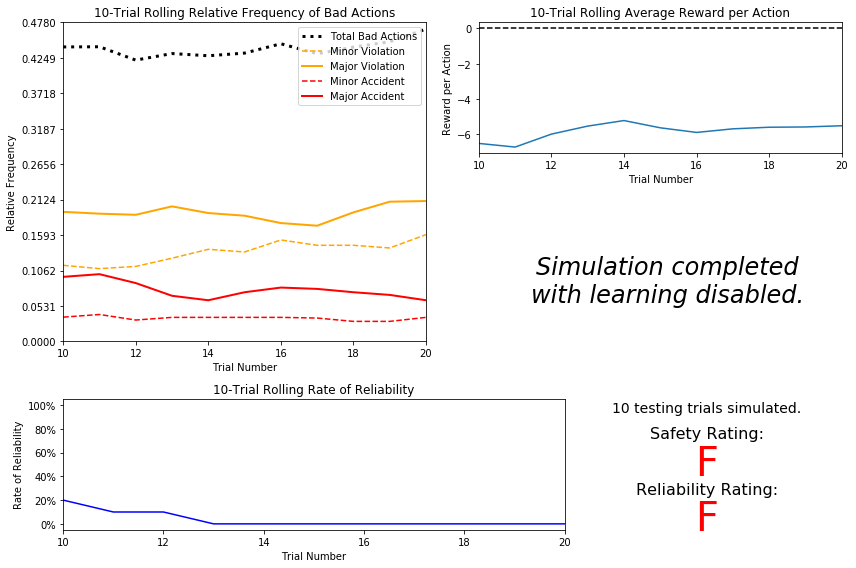

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

**1) The agent is making bad decisions between 37 and 47 percent of the time. The percent of collisions during that time ranges between 8 and 10 percent, which is about 20 percent of the bad decisions, so about 1 in 5 bad decisions cause a collision.**

**2) The agent has four possible actions to choose from. If you suppose that in any situation 3 out 4 decisions would be bad, then you have a 75 percent chance of making a bad decision. Since bad decisions rose over time, I wonder if increasing n_tests would get the bad decision rate to eventually approximate 75 percent.**

**3) The rewards are below -4.0 for the entirety of the trial period, confirming that making random decisions yields lots of negative consequences. There's a period between trials 13-19 that show rewards improving slightly, but it's still heavily negative during that time.**

**4) Most of the indicators are relatively flat over time. Some exceptions are Total Bad Actions, Minor Violations, and possibly the Rolling Rate of Reliability. In the aggregate there's a general worsening of metrics over time, but it's only driven by a handful of indicators.**

**5) This smartcab is abominable. Imagine that you were in a cab with a driver who acted seemingly at random. The F scores for both safety and reliability are just and deserved.**

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

**'light' is the most important feature for safety and efficiency. It has applicability for safety because it regulates the flow of traffic in intersections and it has applicability for efficiency because it can halt or enable our smartcab's movement. I would choose this feature.**

**'waypoint' is an important feature for efficiency because it orients the smartcab to the destination. While not always indicative of the precise direction the smartcab needs to go, it nonetheless is a crucial indicator of the general direction to move toward. I would choose this feature.**

**'oncoming' could be an important feature for safety because if the light is green and the waypoint is left, the smartcab could cross oncoming traffic without this feature, thereby causing a collision. Also, if you were turning right on a red light, you would have to yield to oncoming traffic turning left. I would choose this feature.**

**'left' could be helpful in only one instance: turning right on a red light. Other than that, it's information is redundant if you have 'light.' Given the complex nature of turning right on red, I would choose this feature because I want my agent to learn how to navigate this.**

**'right' is not an important feature because the traffic light will protect you from cars on your right, and it will keep them out of our way, as well. I would not choose this feature.**

**'deadline' theoretically would be important primarily for efficiency sake, but I also think it would add too much extraneous information. For example, knowing that you have 62 seconds remaining instead of 61 seconds isn't particularly helpful. So I would not choose this feature.**

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

**From the environment notebook, we know that light has two states, oncoming could have three, and waypoint could have four. Multiplying those gives us (2 * 3 * 4 =) 24 total states.**

**Twenty-four doesn't seem like a terribly unreasonable state space to me, so I would think that 10 training trials would be ample to develop a policy for every possible state.**

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

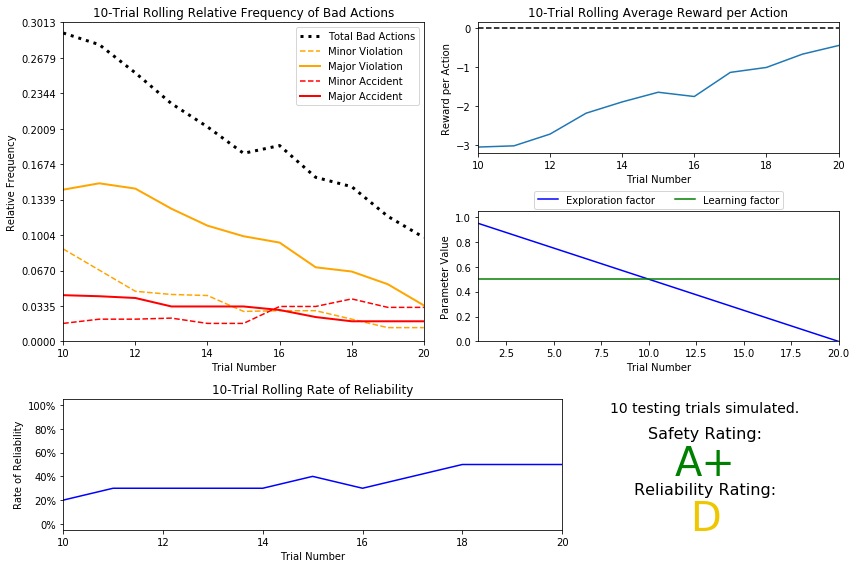

In [5]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

**Reliability is F in both cases, so neither cab is good at making it to the destination on time. This makes the rolling rate of reliability graph in both cases similar, as well. Those are the similarities I see.**

**There were 20 training trials before the testing started; this makes sense because we made epsilon decay linearly from 1.0 in .05 increments. Twenty times .05 is 1.0, so 20 training trials makes sense.**

**Yep, I set self.epsilon = epsilon and set epsilon = 1. I then subtracted 0.05 from self.epsilon with every trial.**

**The number of bad actions increased until about training trial number 16, wherein it levelled off. Soon after, the average reward began to climb steadily.**

**Safety got a big boost from F to B, mainly by cutting out all collisions and most traffic violations. Reliability, however, is abysmal, suggesting a lot of work on that front.**

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

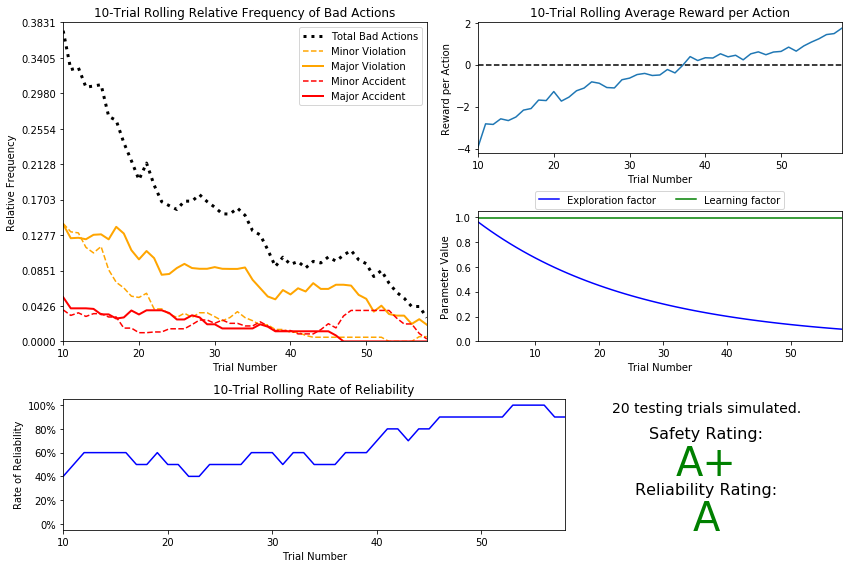

In [51]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

**1) I used an exponential function to decay epsilon in the form of math.exp( -1 * (self.n_trials * 0.04)). I settled on this function after a long period of trial and error. I found that lowering my constant value to 0.04 gave me an appropriate amount of training trials; 0.05 gave me too few trials and 0.03 gave me too many.**

**2) It ended up being just shy of 60 trials before testing began.**

**3) I used a tolerance level of 0.1 mainly because it gave my epsilon decay function enough time to learn but not so much time that my computer got hot from constant activity. It thus satisfied the criterion of decaying too tolerance at a reasonable rate. I chose an alpha rate of 0.99 because it maximized my learning rewards. I wanted my smartcab to learn as fast as possible, and that seemed to be aided by a high value of alpha.**

**4) The Q-learner is much better in this state, although it took me quite a while to get it to this level. I had to scrutinize my agent code quite a bit just to get a poor grade; getting to A in both categories required me to look at the environment code, as well, to really think through the decisions that my smartcab was making and why.**

**5) I would say so. After it stops making random decisions and begins to build its own dictionary of values, it develops stable policies that are yield both safety and timely arrivals at the destination.**

**6) I am quite satisfied, mainly because I worked so hard to get these A ratings! Given the trendlines in my graphs, it's clear that running more training trials would get me to consistent A+ ratings, but I want to honor the reasonable rate requirement and keep the number of trials within normal bounds. If I were deploying this product for real-world use, however, I would use tons of training trials. I'm satisfied that this learned knows how to generalize well and would only improve with more trials.**

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**1) Optimal policy. I interpret this as the intersection of my state space and the environment rules created by Udacity in a separate notebook. I chose 'light,' 'waypoint,' and 'oncoming' as the states my agent uses to create policies. When the agent uses these features to build a state, it goes to the environment notebook to derive the rewards that would be associated with any given action given the current state. The choose action function then determines which of the actions to take, based on the rewards created in the previous step. That is the basic calculation for a rewards-based optimal policy for any given state-action pair.**

**In layman's terms, the optimal policy for the smartcab in the given environment is to follow the waypoint so long as it doesn't conflict with a red light or oncoming traffic. In terms of specific examples, suppose that our smartcab comes to a red light and the waypoint is to go forward. The optimal policy would be stay put until the light turns greeen.**

**Another example would be if our smartcab has a green light, the waypoint says to turn left, and oncoming traffic is moving forward because they have a green light. The optimal policy would be to go forward, or even turn right, instead of following the waypoint left and turning into oncoming traffic. Even worse would be to sit still at the light and obstruct traffic.**

**2) Most are correct. However, there are a few aberrations. For example, for states where the light is red, the agent has a higher reward for no action than following the waypoint, even if such an action wouldn't cause a collision with oncoming traffic. What I suspect is happening in these cases is that inputs that I'm not incorporating--such as 'left' or 'right' traffic are nonetheless shaping policies based on collisions caused during the training period. Therefore, my agent has learned to account for features without explicitly being told to, and that's what's causing it to create higher rewards for actions that are more conservative than what the optimal policy would dictate.**

**3) Let's do the first three.**

('red', 'forward', None)
 -- None : 1.03
 -- forward : -10.07
 -- right : 0.33
 -- left : -9.74
 
**The light is red, waypoint is forward, and there's no oncoming traffic. The reward is highest for no action (because of the red light), lowest for going forward (because that would be a major violation), and just over 0 for turning right on red, which makes sense because it's safer to stay still than time your entrance intro traffic coming from your left.**

('green', 'right', None)
 -- None : -4.44
 -- forward : 0.91
 -- right : 2.13
 -- left : 0.36
 
**Light is green, waypoint is right, and there's no oncoming traffic. Rewards are highest for going right, negative for staying still, okay for merely going forward, and not terrible for turning left. This all makes good logical sense.**

('green', 'right', 'left')
 -- None : -4.77
 -- forward : 1.07
 -- right : 3.00
 -- left : -0.09
 
**Finally, light is green, waypoint is right, and this time oncoming traffic wants to head to its left (our right) but has a red light since ours is green. Reward is highest for following the waypoint right, strongly negative for staying still, okay for going forward, and technically negative for going left, but it wouldn't be the end of the world if we did. Because we have a green light, the agent think it's worse to sit still than turning left even though that's the wrong way because at least we're moving. If I were in a self-driving car, I would be more freaked out if it froze at a green than appeared to make a wrong turn; if I ended up at the destination on time, I wouldn't even remember it.**

**4) I can see two.**

('red', 'right', 'left')
 -- None : 0.14
 -- forward : -9.08
 -- right : 3.27
 -- left : -10.98
 
**The agent here would turn right on red. Going back to my point earlier about implicitly factoring in inputs that I didn't explicitly tell it to, the agent has clearly decided that turning right on red when the waypoint is right is a good idea, and to be honest, it's safety rating convinces me that it must know what it's doing. However, from my knowledge of traffic laws and the frequency with which I see "No right turns on red" signs, I know that in the real world, this is a riskier move than in the simulated world. So that's the first exception I see. Now for the second example:**

('red', 'right', 'forward')
 -- None : 0.20
 -- forward : -9.11
 -- right : -19.75
 -- left : -9.55
 
**Ironically, based on my knowledge of real-world scenarios, I think the agent is being too conservative here! The agent will not turn right on red even though oncoming traffic is headed straight ahead, thus shielding our agent from traffic from our left. It could be that because oncoming traffic has a green light, some of them are turning left (our right) instead of only going forward, which thus caused some collisions, which makes our agent gunshy of turning right on red in this case. Given the strong negative reward associated with that action in this case, I'm guessing that's what happened.**

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.